In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision as tv
import cv2 
import numpy as np
import os 
import matplotlib.pyplot as plt
from tqdm import tqdm 
import torchvision

C:\Users\AFROkot\AppData\Roaming\JupyterLab-Portable-3.1.0-3.9\apps\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\AFROkot\AppData\Roaming\JupyterLab-Portable-3.1.0-3.9\apps\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
class CaDDataset(torch.utils.data.Dataset):
    def __init__ (self, dir1, dir2):
        super() .__init__()
        
        self.dir1 = dir1
        
        self.dir2 = dir2
        
        self.dir1_list = sorted(os.listdir(dir1))
        self.dir2_list = sorted(os.listdir(dir2))
    
    def __len__ (self):
        return len(self.dir1_list) + len(self.dir2_list)
    
    def __getitem__(self, idx):
    
        if idx < len(self.dir1_list):
            class_id = 0
            img_path = os.path.join(self.dir1, self.dir1_list[idx])
            
        else:
            class_id = 1
            idx -= len(self.dir1_list)
            img_path = os.path.join(self.dir2, self.dir2_list[idx])
            
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32)
        img = img/255.0
        
        img = cv2.resize(img,(128,128), interpolation=cv2.INTER_AREA)
        
        img = img.transpose((2,0,1))
        t_img = torch.from_numpy(img)
        t_class_id = torch.tensor(class_id)
        
        return {'img':t_img, 'label': t_class_id}
        
    

In [3]:
train_dogs_path = 'E:/pandas/cat_and_dog/training_set/dogs/'
train_cats_path = 'E:/pandas/cat_and_dog/training_set/cats/'

train_ds_catsdogs = CaDDataset(train_dogs_path, train_cats_path)

test_dogs_path = 'E:/pandas/cat_and_dog/test_set/dogs/'
test_cats_path = 'E:/pandas/cat_and_dog/test_set/cats/'

test_ds_catsdogs = CaDDataset(test_dogs_path, test_cats_path)

In [4]:
batch_size = 16 

train_loader = torch.utils.data.DataLoader(train_ds_catsdogs,
                                           shuffle=True,
                                           batch_size=batch_size,
                                           num_workers=0,
                                           drop_last=True)

test_loader = torch.utils.data.DataLoader(test_ds_catsdogs,
                                           shuffle=True,
                                           batch_size=batch_size,
                                           num_workers=0,
                                           drop_last=False)

In [5]:
model = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)


In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9,0.999))

In [7]:
def accuracy(pred, label):
    answer = f.softmax(pred.detach()).numpy().argmax(1) == label.numpy()
    return answer.mean()

In [8]:
epoch = 10

for epoch in range(epoch):
    loss_val = 0
    acc_val = 0
    for sample in (pbar := tqdm(train_loader)):
        img, label = sample['img'], sample['label']
        optimizer.zero_grad()
        
        #label = f.one_hot(label, 2).float()
        #label = torch.argmax(label, dim=1)
        
        pred = model(img)
        loss = loss_fn(pred, label)
        
        loss.backward()
        loss_item = loss.item()
        loss_val += loss_item
        
        optimizer.step()
        
        acc_current = accuracy(pred, label)
        acc_val += acc_current
    pbar.set_description(f'loss: {loss_item:.5f} \taccuracy: {acc_current:.3f}')
    print(loss_val/len(train_loader))
    print(acc_val/len(train_loader))
    

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]C:\Users\AFROkot\AppData\Local\Temp/ipykernel_2600/2411839315.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = f.softmax(pred.detach()).numpy().argmax(1) == label.numpy()
100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [05:10<00:00,  1.61it/s]


0.7780273084901274
0.876


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:22<00:00,  1.90it/s]


0.07591995275532827
0.973


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:21<00:00,  1.92it/s]


0.03297773468942614
0.98875


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:23<00:00,  1.90it/s]


0.015493572067760397
0.99475


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:23<00:00,  1.90it/s]


0.05012427881125768
0.984375


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:21<00:00,  1.91it/s]


0.03454797375308408
0.987875


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:25<00:00,  1.88it/s]


0.02365199561942427
0.9915


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:28<00:00,  1.86it/s]


0.02186966667570232
0.9925


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:24<00:00,  1.89it/s]


0.020547811799631745
0.993125


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:22<00:00,  1.90it/s]

0.014271291129327438
0.99575


In [9]:
loss_val = 0
acc_val = 0
for sample in (pbar := tqdm(test_loader)):
    with torch.no_grad():
        img, label = sample['img'], sample['label']
        pred = model(img)
        
        loss = loss_fn(pred, label)
        loss_item = loss.item()
        loss_val += loss_item

        acc_current = accuracy(pred, label)
        acc_val += acc_current
    pbar.set_description(f'loss: {loss_item:.5f} \taccuracy: {acc_current:.3f}')
print(loss_val/len(test_loader))
print(acc_val/len(test_loader))


  0%|                                                                                          | 0/127 [00:00<?, ?it/s]C:\Users\AFROkot\AppData\Local\Temp/ipykernel_2600/2411839315.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = f.softmax(pred.detach()).numpy().argmax(1) == label.numpy()
loss: 0.17034 	accuracy: 0.857: 100%|████████████████████████████████████████████████| 127/127 [00:39<00:00,  3.25it/s]

0.16258878150138903
0.9585208098987626


In [ ]:
'''pred = model(simple['img'])
_, predicted = torch.max(pred, 1)
print(predicted)'''

dog


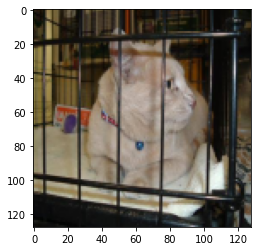

cat
cat


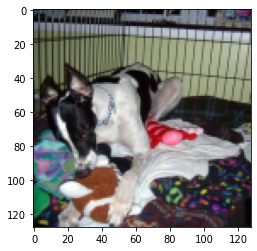

dog
cat


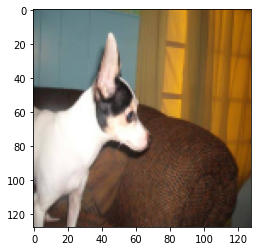

dog
dog


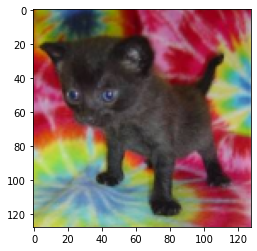

cat
cat


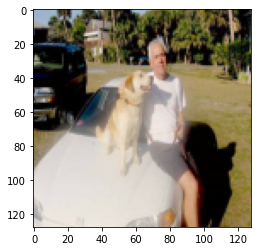

dog
dog


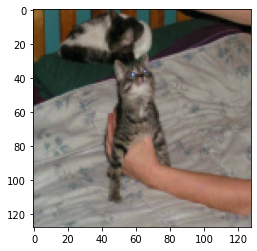

cat
cat


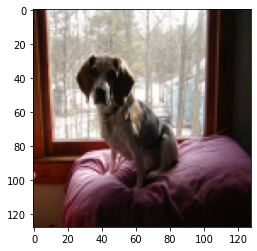

dog
cat


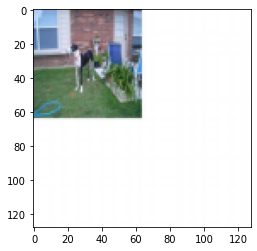

dog
dog


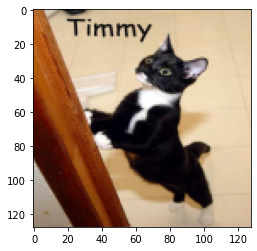

cat
cat


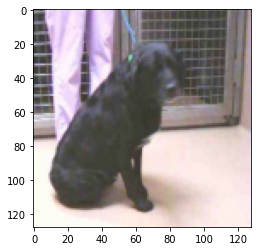

dog
dog


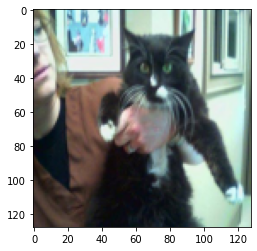

cat
dog


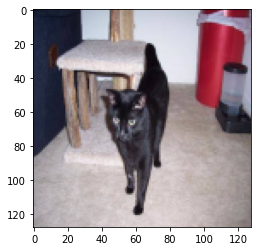

cat
dog


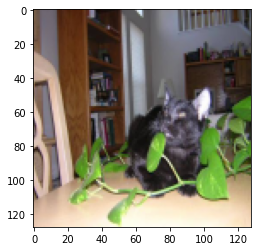

cat
cat


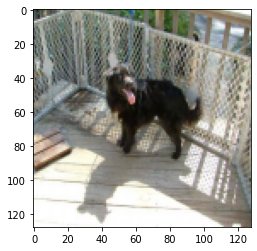

dog
cat


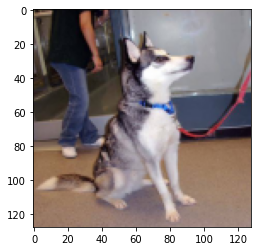

dog
cat


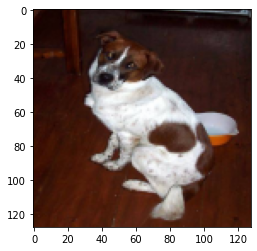

dog
dog


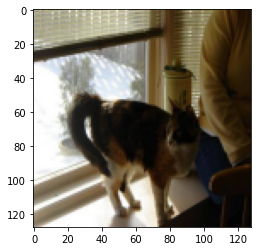

cat
dog


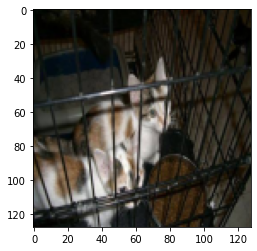

cat
dog


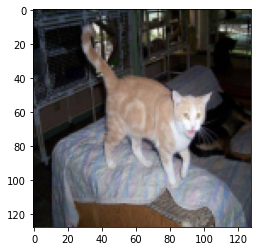

cat
dog


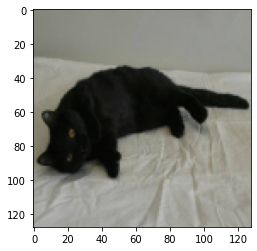

cat
dog


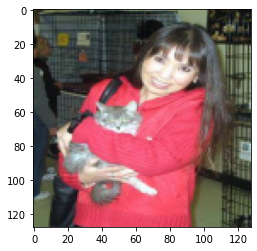

cat
dog


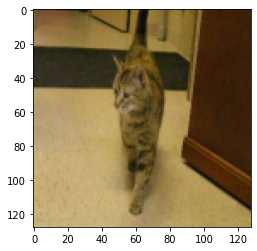

cat
dog


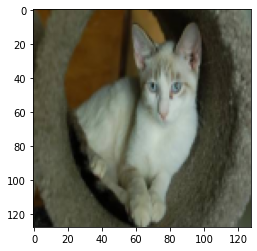

cat
dog


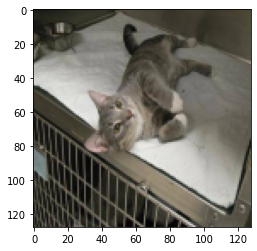

cat
dog


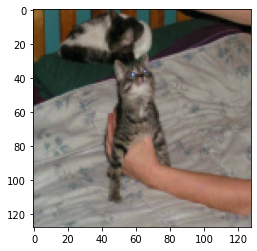

cat
dog


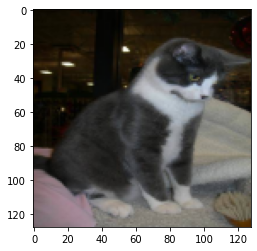

cat
cat


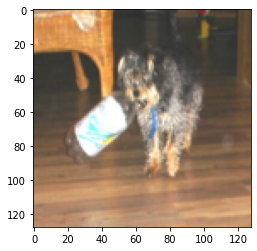

dog
dog


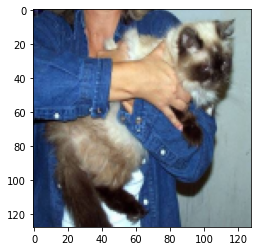

cat
dog


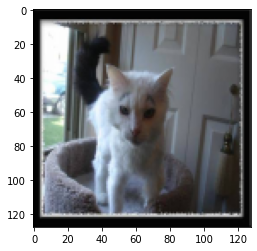

cat
cat


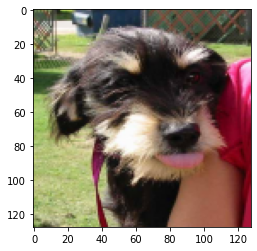

dog
dog


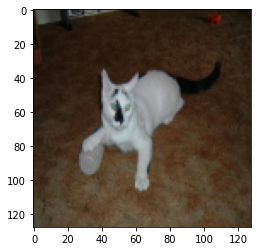

cat
dog


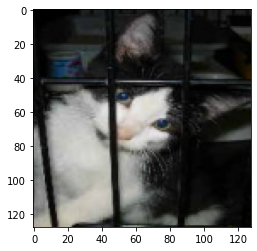

cat
dog


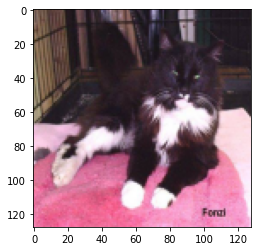

cat
dog


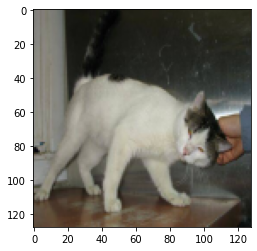

cat
dog


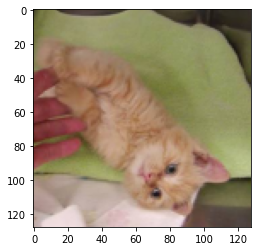

cat
dog


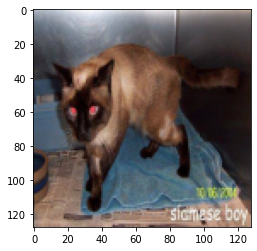

cat
dog


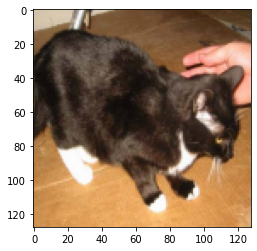

cat
dog


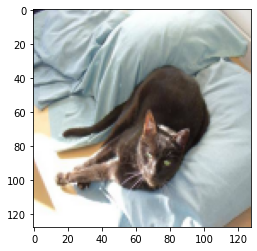

cat
dog


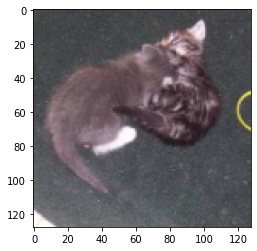

cat
dog


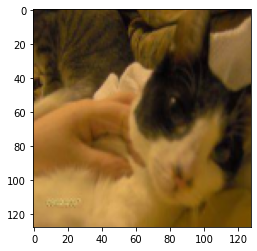

cat


KeyboardInterrupt: 

In [34]:
CnD = ['dog', 'cat']

for simple in test_loader:
    pred = model(simple['img'])
    _, predicted = torch.max(pred, 1)
    
    for i in range(len(simple['img'])):
        
        if predicted[i] != simple['label'][i]:
            print(CnD[predicted[i]])
            plt.imshow((simple['img'][i].numpy().transpose((1, 2, 0)) * 255).astype('uint8'))
            plt.show()
            print(CnD[simple['label'][i]])

In [11]:
CnD = ['dog', 'cat']
num= 0 
nenum = 0
for simple in test_loader:
    pred = model(simple['img'])
    _, predicted = torch.max(pred, 1)
    
    for i in range(len(simple['img'])):
        num +=1
        if predicted[i] != simple['label'][i]:
            nenum +=1
print(num ,' ', nenum)

2023   72
